In [1]:
#venv: MLEnv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from math import sqrt

import sqlite3
import warnings
warnings.filterwarnings('ignore')

import datetime
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns; sns.set_theme(color_codes=True)
sns.set_context("paper")


In [2]:
print(tf.__version__)

2.8.0


In [3]:
conn = sqlite3.connect(r'/Users/rosaicelaroman/Desktop/portfolio_work/earthquake_modeling/Database/db/earthquake_db')
print("Connected to database...")

Connected to database...


In [4]:
model_df = pd.read_sql_query("SELECT * FROM earthquake_raw", conn)
model_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-06T01:42:39.855Z,37.384000,-117.107500,1.10,1.30,ml,8.0,149.46,0.875000,0.2175,...,2022-01-06T01:47:19.317Z,"37 km SSE of Goldfield, Nevada",earthquake,NaN,39.10,0.290,4.0,automatic,nn,nn
1,2022-01-06T01:31:33.698Z,38.181000,-117.818000,7.30,1.40,ml,11.0,154.64,0.119000,0.1017,...,2022-01-06T01:47:40.245Z,"34 km SE of Mina, Nevada",earthquake,NaN,2.00,0.460,5.0,automatic,nn,nn
2,2022-01-06T01:24:20.083Z,61.340700,-149.885200,30.00,1.50,ml,NaN,NaN,NaN,0.7500,...,2022-01-06T01:29:22.015Z,"5 km ESE of Point MacKenzie, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
3,2022-01-06T01:15:15.851Z,62.870300,-150.762500,111.30,2.10,ml,NaN,NaN,NaN,0.3200,...,2022-01-06T01:29:21.875Z,"41 km N of Petersville, Alaska",earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak
4,2022-01-06T01:10:44.629Z,64.014500,-148.765700,1.90,1.50,ml,NaN,NaN,NaN,0.7200,...,2022-01-06T01:15:56.292Z,"17 km E of Ferry, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38675,2022-03-01T21:22:14.615Z,60.952300,-151.257700,0.00,2.20,ml,NaN,NaN,NaN,0.9100,...,2022-03-01T21:26:42.710Z,"14 km SSW of Tyonek, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
38676,2022-03-01T21:16:45.780Z,39.425333,-110.319667,-1.21,1.42,md,5.0,192.00,0.004385,0.0400,...,2022-03-01T22:46:44.500Z,"15 km SSE of Sunnyside, Utah",earthquake,1.33,0.22,0.212,4.0,reviewed,uu,uu
38677,2022-03-01T21:08:58.910Z,38.835167,-122.800003,2.22,0.85,md,11.0,77.00,0.008209,0.0100,...,2022-03-01T21:26:18.107Z,"7km WNW of Cobb, CA",earthquake,0.40,0.90,NaN,1.0,automatic,nc,nc
38678,2022-03-31T21:00:50.670Z,38.821499,-122.793167,3.21,0.35,md,10.0,90.00,0.012760,0.0100,...,2022-03-31T21:02:26.715Z,"6km NNW of The Geysers, CA",earthquake,0.63,1.10,NaN,1.0,automatic,nc,nc


In [5]:
model_df['time'] = pd.to_datetime(model_df['time'])
model_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-06 01:42:39.855000+00:00,37.384000,-117.107500,1.10,1.30,ml,8.0,149.46,0.875000,0.2175,...,2022-01-06T01:47:19.317Z,"37 km SSE of Goldfield, Nevada",earthquake,NaN,39.10,0.290,4.0,automatic,nn,nn
1,2022-01-06 01:31:33.698000+00:00,38.181000,-117.818000,7.30,1.40,ml,11.0,154.64,0.119000,0.1017,...,2022-01-06T01:47:40.245Z,"34 km SE of Mina, Nevada",earthquake,NaN,2.00,0.460,5.0,automatic,nn,nn
2,2022-01-06 01:24:20.083000+00:00,61.340700,-149.885200,30.00,1.50,ml,NaN,NaN,NaN,0.7500,...,2022-01-06T01:29:22.015Z,"5 km ESE of Point MacKenzie, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
3,2022-01-06 01:15:15.851000+00:00,62.870300,-150.762500,111.30,2.10,ml,NaN,NaN,NaN,0.3200,...,2022-01-06T01:29:21.875Z,"41 km N of Petersville, Alaska",earthquake,NaN,0.80,NaN,NaN,automatic,ak,ak
4,2022-01-06 01:10:44.629000+00:00,64.014500,-148.765700,1.90,1.50,ml,NaN,NaN,NaN,0.7200,...,2022-01-06T01:15:56.292Z,"17 km E of Ferry, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38675,2022-03-01 21:22:14.615000+00:00,60.952300,-151.257700,0.00,2.20,ml,NaN,NaN,NaN,0.9100,...,2022-03-01T21:26:42.710Z,"14 km SSW of Tyonek, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
38676,2022-03-01 21:16:45.780000+00:00,39.425333,-110.319667,-1.21,1.42,md,5.0,192.00,0.004385,0.0400,...,2022-03-01T22:46:44.500Z,"15 km SSE of Sunnyside, Utah",earthquake,1.33,0.22,0.212,4.0,reviewed,uu,uu
38677,2022-03-01 21:08:58.910000+00:00,38.835167,-122.800003,2.22,0.85,md,11.0,77.00,0.008209,0.0100,...,2022-03-01T21:26:18.107Z,"7km WNW of Cobb, CA",earthquake,0.40,0.90,NaN,1.0,automatic,nc,nc
38678,2022-03-31 21:00:50.670000+00:00,38.821499,-122.793167,3.21,0.35,md,10.0,90.00,0.012760,0.0100,...,2022-03-31T21:02:26.715Z,"6km NNW of The Geysers, CA",earthquake,0.63,1.10,NaN,1.0,automatic,nc,nc


In [6]:
#adding column of converted time to datetime
model_df['Unix Time'] = pd.to_datetime(model_df['time']).astype(int)/10**9
model_df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Unix Time
0,2022-01-06 01:42:39.855000+00:00,37.3840,-117.1075,1.1,1.3,ml,8.0,149.46,0.875,0.2175,...,"37 km SSE of Goldfield, Nevada",earthquake,NaN,39.1,0.29,4.0,automatic,nn,nn,1.641433e+09
1,2022-01-06 01:31:33.698000+00:00,38.1810,-117.8180,7.3,1.4,ml,11.0,154.64,0.119,0.1017,...,"34 km SE of Mina, Nevada",earthquake,NaN,2.0,0.46,5.0,automatic,nn,nn,1.641433e+09
2,2022-01-06 01:24:20.083000+00:00,61.3407,-149.8852,30.0,1.5,ml,NaN,NaN,NaN,0.7500,...,"5 km ESE of Point MacKenzie, Alaska",earthquake,NaN,0.2,NaN,NaN,automatic,ak,ak,1.641432e+09
3,2022-01-06 01:15:15.851000+00:00,62.8703,-150.7625,111.3,2.1,ml,NaN,NaN,NaN,0.3200,...,"41 km N of Petersville, Alaska",earthquake,NaN,0.8,NaN,NaN,automatic,ak,ak,1.641432e+09
4,2022-01-06 01:10:44.629000+00:00,64.0145,-148.7657,1.9,1.5,ml,NaN,NaN,NaN,0.7200,...,"17 km E of Ferry, Alaska",earthquake,NaN,0.6,NaN,NaN,automatic,ak,ak,1.641431e+09


In [7]:
#drop columns not needed
cleaned_df = model_df.drop(columns=['id', 'nst','rms','magNst','net', 'time', 'magType', 'gap','dmin', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'status', 'locationSource', 'magSource'])
cleaned_df

,latitude,longitude,depth,mag,Unix Time
0,37.384000,-117.107500,1.10,1.30,1.641433e+09
1,38.181000,-117.818000,7.30,1.40,1.641433e+09
2,61.340700,-149.885200,30.00,1.50,1.641432e+09
3,62.870300,-150.762500,111.30,2.10,1.641432e+09
4,64.014500,-148.765700,1.90,1.50,1.641431e+09
...,...,...,...,...,...
38675,60.952300,-151.257700,0.00,2.20,1.646170e+09
38676,39.425333,-110.319667,-1.21,1.42,1.646169e+09
38677,38.835167,-122.800003,2.22,0.85,1.646169e+09
38678,38.821499,-122.793167,3.21,0.35,1.648760e+09


In [8]:
cleaned_df.isnull().sum()

latitude     0
longitude    0
depth        0
mag          6
Unix Time    0
dtype: int64

In [9]:
cleaned_df_dropped = cleaned_df.dropna()

In [10]:
cleaned_df_dropped = cleaned_df_dropped.rename(columns={'mag':'label'})
cleaned_df_dropped

,latitude,longitude,depth,label,Unix Time
0,37.384000,-117.107500,1.10,1.30,1.641433e+09
1,38.181000,-117.818000,7.30,1.40,1.641433e+09
2,61.340700,-149.885200,30.00,1.50,1.641432e+09
3,62.870300,-150.762500,111.30,2.10,1.641432e+09
4,64.014500,-148.765700,1.90,1.50,1.641431e+09
...,...,...,...,...,...
38675,60.952300,-151.257700,0.00,2.20,1.646170e+09
38676,39.425333,-110.319667,-1.21,1.42,1.646169e+09
38677,38.835167,-122.800003,2.22,0.85,1.646169e+09
38678,38.821499,-122.793167,3.21,0.35,1.648760e+09


In [11]:
train_dataset = cleaned_df_dropped.sample(frac=0.8, random_state=0)
test_dataset = cleaned_df_dropped.drop(train_dataset.index)

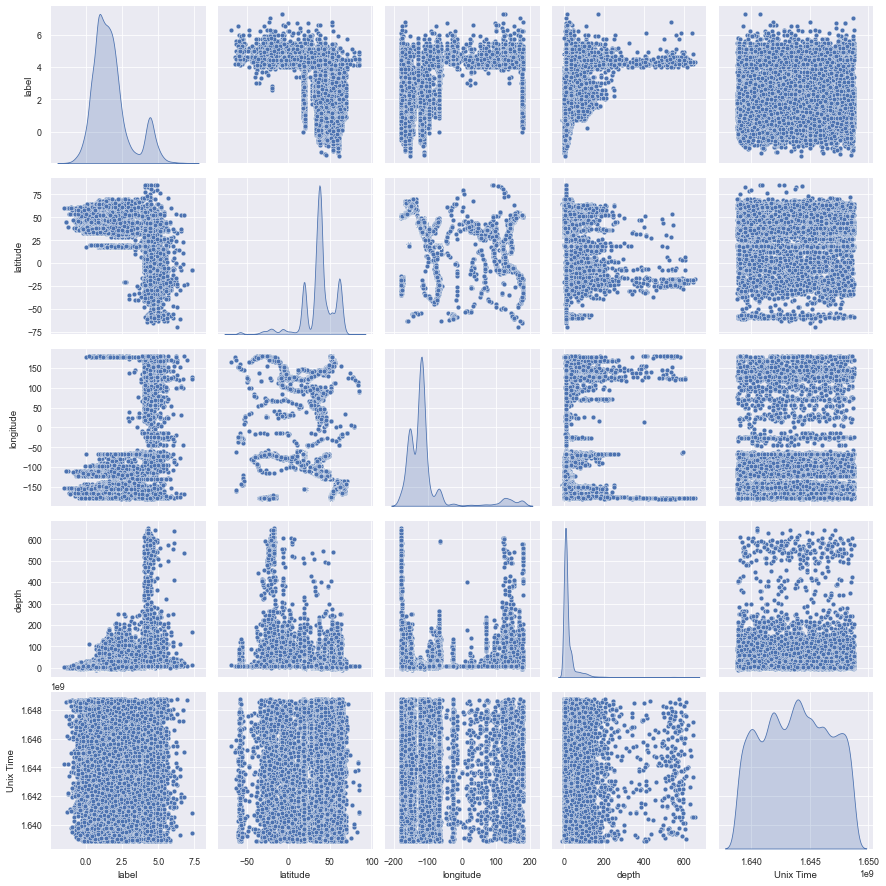

In [12]:
sns.pairplot(train_dataset[['label', 'latitude', 'longitude', 'depth', 'Unix Time']], diag_kind='kde')

In [13]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,30939.0,3.609295e+01,2.024032e+01,-6.978250e+01,3.322775e+01,3.818020e+01,4.601575e+01,8.530930e+01
longitude,30939.0,-1.063765e+02,7.369217e+01,-1.799985e+02,-1.496787e+02,-1.208458e+02,-1.151909e+02,1.799981e+02
depth,30939.0,2.326146e+01,5.521077e+01,-1.000000e+01,3.380405e+00,8.810000e+00,1.800000e+01,6.538700e+02
label,30939.0,1.727412e+00,1.290844e+00,-1.490000e+00,8.500000e-01,1.480000e+00,2.180000e+00,7.300000e+00
Unix Time,30939.0,1.643789e+09,2.786426e+06,1.638842e+09,1.641522e+09,1.643835e+09,1.646111e+09,1.648760e+09


In [14]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('label')
test_labels = test_features.pop('label')

In [15]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
latitude,3.609295e+01,2.024032e+01
longitude,-1.063765e+02,7.369217e+01
depth,2.326146e+01,5.521077e+01
label,1.727412e+00,1.290844e+00
Unix Time,1.643789e+09,2.786426e+06


In [16]:
allset = np.array(train_features)

allset_normalizer = layers.Normalization(axis=-1)
allset_normalizer.adapt(allset)

2022-03-31 19:59:48.707580: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu', input_shape=(4,)),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])
  return model

In [18]:
dnn_model = build_and_compile_model(allset_normalizer)

In [19]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,554
Trainable params: 4,545
Non-trainable params: 9
_________________________________________________________________


In [20]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=200)

CPU times: user 2min 31s, sys: 42.2 s, total: 3min 13s
Wall time: 1min 48s


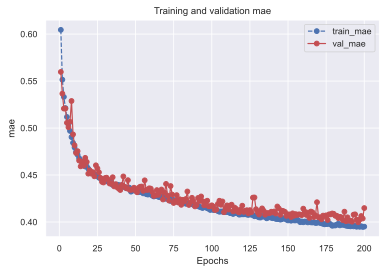

In [21]:
#following example: https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


# val_metrics = history.history['val_'+metric]
# print(val_metrics)
plot_metric(history, 'mae')

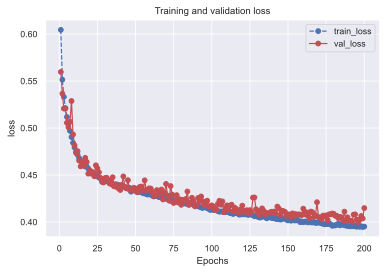

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


# val_metrics = history.history['val_'+metric]
# print(val_metrics)
plot_metric(history, 'loss')

In [23]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = dnn_model.evaluate(test_features, test_labels)
print("test loss, test mae:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = dnn_model.predict(test_features[:])
print("predictions shape:", predictions.shape)

Evaluate on test data
242/242 [==============================] - 0s 699us/step - loss: 0.4085 - mae: 0.4085
test loss, test mae: [0.4085035026073456, 0.4085035026073456]
Generate predictions for 3 samples
predictions shape: (7735, 1)


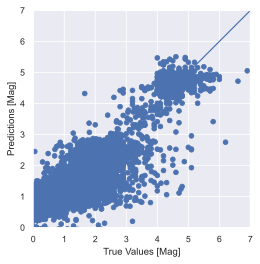

In [24]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Mag]')
plt.ylabel('Predictions [Mag]')
lims = [0, 7]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

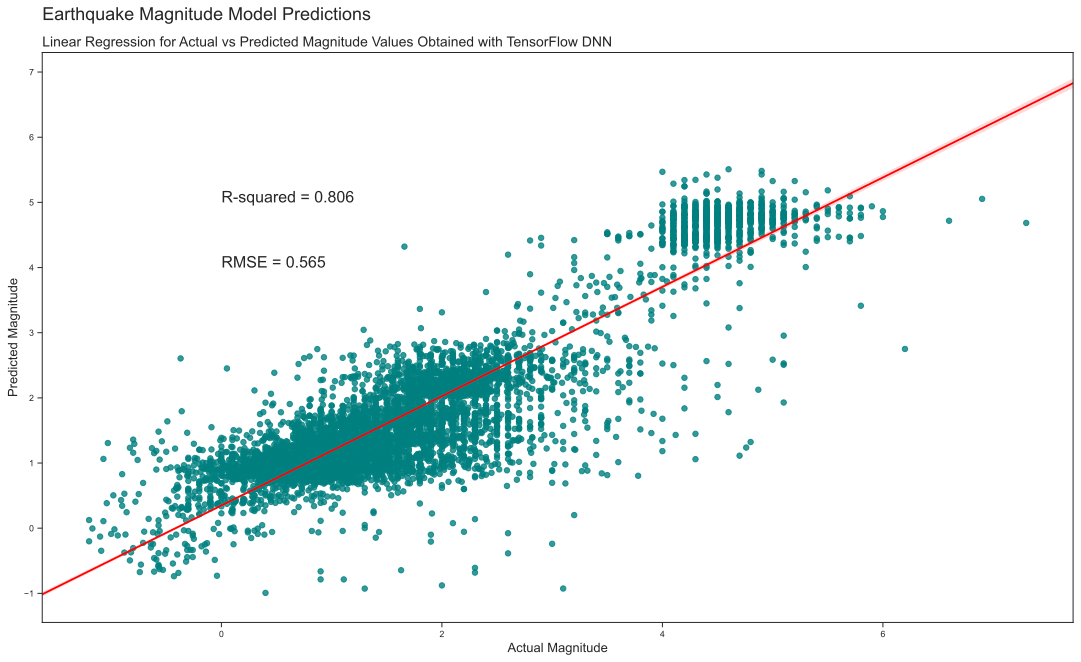

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

x = np.array(test_labels)
y = np.array(test_predictions)
test_mse = mean_squared_error(test_labels,test_predictions)
rmse = sqrt(test_mse)

sns.set_style('ticks')
x,y = pd.Series(x, name="Actual"), pd.Series(y, name="Prediction")
# sns.lmplot(x ='Actual', y ='Prediction', data = mag_pred_all, markers =['o'],  palette ='coolwarm')
ax = sns.regplot(x=x, y=y, ci=95, truncate=False, scatter_kws={"s": 30, "color":'teal'}, line_kws={"color": "red"})
ax.set_axisbelow(True)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.ylabel('Predicted Magnitude', fontsize=13)
plt.xlabel('Actual Magnitude',  fontsize=13)
# Bigger title
plt.suptitle('Earthquake Magnitude Model Predictions', x=0.125, y=0.94, ha='left', fontsize=18)
# Subtitle
plt.title('Linear Regression for Actual vs Predicted Magnitude Values Obtained with TensorFlow DNN', loc='left', fontsize=14)
plt.annotate("R-squared = {:.3f}".format(r2_score(x, y)), (0, 5),  fontsize=16)
plt.annotate("RMSE = {:.3f}".format(rmse), (0, 4.0), fontsize=16)

fig.savefig('../static/images/NN_mag_linear_sns.png', bbox_inches='tight', dpi=600)
plt.show()

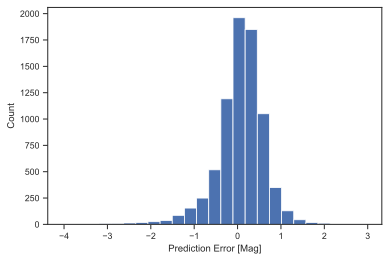

In [26]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Mag]')
_ = plt.ylabel('Count')

In [27]:
# make a single prediction
from datetime import datetime
import time
lat = float(input('Enter a latitude (in decimal form; negative for southern hemisphere): '))
lon = float(input('Enter a longitude (in decimal form; negative for west of meridian): '))
depth = float(input('Enter a depth (in km, only numerical value): '))
date_input = input('Enter a date (yyyy/mm/dd): ')
time_input = input('Enter a time in UTC: ')
datetime_str = date_input + ' '+ time_input
date_time_obj = datetime.strptime(datetime_str, '%Y/%m/%d %H:%M:%S')
date_time_unix = (time.mktime(date_time_obj.timetuple()))
single_features = [[lat,lon,depth,date_time_unix]]
y_pred = dnn_model.predict(single_features)
print('Predicted Magnitude: %g' % y_pred)

Predicted Magnitude: 5.05869


Test with new data from USGS

In [28]:
#obtain USGS data for the day
page_url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.csv"

test_df = pd.read_csv(page_url)
test_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-04-01T02:29:08.740Z,38.834167,-122.806335,2.19,0.82,md,12.0,66.0,0.01115,0.01,...,2022-04-01T02:45:13.640Z,"7km W of Cobb, CA",earthquake,0.33,0.87,0.280,3.0,automatic,nc,nc
1,2022-04-01T02:28:12.930Z,36.810333,-121.544670,5.36,2.89,md,61.0,27.0,0.03405,0.19,...,2022-04-01T02:51:17.040Z,"4km S of San Juan Bautista, CA",earthquake,0.26,0.58,0.150,83.0,automatic,nc,nc
2,2022-04-01T02:13:49.690Z,36.078667,-117.886333,2.26,1.41,ml,18.0,61.0,0.04645,0.13,...,2022-04-01T02:17:20.309Z,"7km NE of Coso Junction, CA",earthquake,0.21,0.30,0.233,19.0,automatic,ci,ci
3,2022-04-01T02:11:52.457Z,64.168700,-145.806900,7.30,1.30,ml,NaN,NaN,NaN,0.28,...,2022-04-01T02:20:32.955Z,"2 km NE of Big Delta, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
4,2022-04-01T02:03:44.520Z,36.569332,-121.153999,2.88,2.06,md,15.0,120.0,0.02539,0.11,...,2022-04-01T02:34:10.705Z,"4km NNW of Pinnacles, CA",earthquake,0.48,0.78,0.120,18.0,automatic,nc,nc


In [29]:
#create unix time column
test_df['Unix Time'] = pd.to_datetime(test_df['time']).astype(int)/10**9

In [30]:
#dropped columns not needed
cleaned_test_df = test_df.drop(columns=['id', 'nst','rms','magNst','net', 'time', 'magType', 'gap','dmin', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'status', 'locationSource', 'magSource'])
cleaned_test_df

,latitude,longitude,depth,mag,Unix Time
0,38.834167,-122.806335,2.19,0.82,1.648780e+09
1,36.810333,-121.544670,5.36,2.89,1.648780e+09
2,36.078667,-117.886333,2.26,1.41,1.648779e+09
3,64.168700,-145.806900,7.30,1.30,1.648779e+09
4,36.569332,-121.153999,2.88,2.06,1.648779e+09
...,...,...,...,...,...
271,61.767300,-148.119200,33.00,1.40,1.648696e+09
272,60.012000,-153.118500,1.14,-0.97,1.648696e+09
273,37.408167,-118.599833,10.35,1.25,1.648696e+09
274,-22.394200,170.165000,10.00,5.70,1.648696e+09


In [31]:
#find if any column has NaNs
cleaned_test_df.isnull().sum()

latitude     0
longitude    0
depth        0
mag          0
Unix Time    0
dtype: int64

In [32]:
test_features1 = cleaned_test_df.copy()

test_labels1 = test_features1.pop('mag')

In [33]:
test_predictions2 = dnn_model.predict(test_features1).flatten()

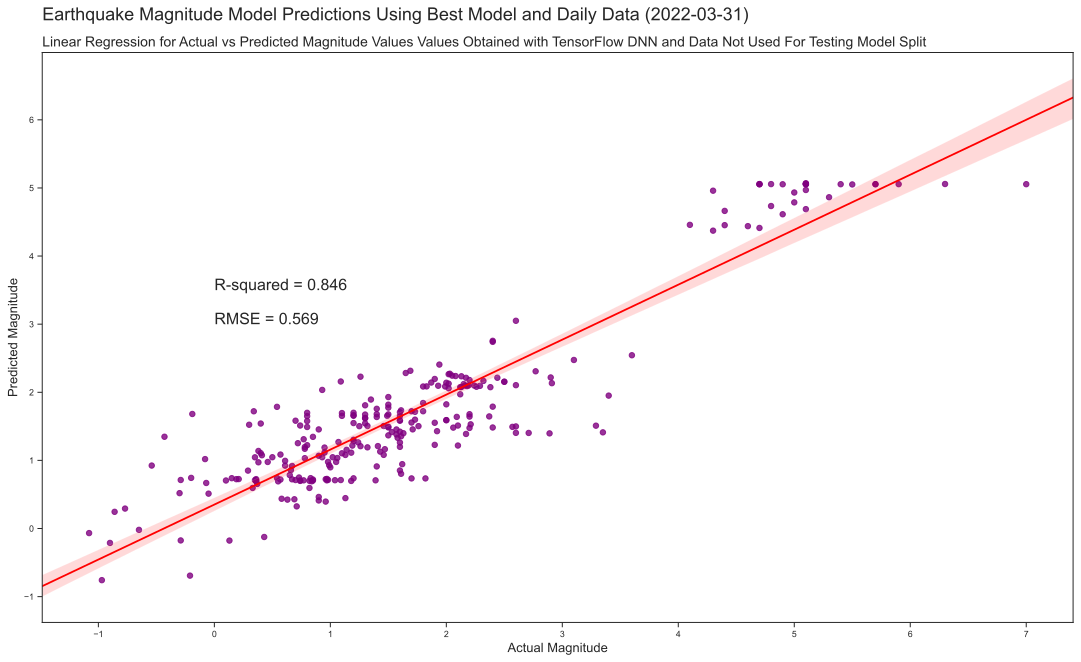

In [35]:
#create grpah for actual vs predicted values
from datetime import date
today = date.today()

x = np.array(test_labels1)
y = np.array(test_predictions2)
test_mse = mean_squared_error(test_labels1,test_predictions2)
rmse = sqrt(test_mse)

sns.set_style('ticks')
x,y = pd.Series(x, name="Actual"), pd.Series(y, name="Prediction")
# sns.lmplot(x ='Actual', y ='Prediction', data = mag_pred_all, markers =['o'],  palette ='coolwarm')
ax = sns.regplot(x=x, y=y, ci=95, truncate=False, scatter_kws={"s": 30, "color":'purple'}, line_kws={"color": "red"})
ax.set_axisbelow(True)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.ylabel('Predicted Magnitude', fontsize=13)
plt.xlabel('Actual Magnitude',  fontsize=13)
# Bigger title
plt.suptitle(f'Earthquake Magnitude Model Predictions Using Best Model and Daily Data ({today})', x=0.125, y=0.94, ha='left', fontsize=18)
# Subtitle
plt.title('Linear Regression for Actual vs Predicted Magnitude Values Values Obtained with TensorFlow DNN and Data Not Used For Testing Model Split', loc='left', fontsize=14)
plt.annotate("R-squared = {:.3f}".format(r2_score(test_labels1, test_predictions2)), (0, 3.5),  fontsize=16)
plt.annotate("RMSE = {:.3f}".format(rmse), (0, 3.0), fontsize=16)

fig.savefig('../static/images/NN_mag_linear_sns_daily.png', bbox_inches='tight', dpi=600)
plt.show()